In [ ]:
!pip install kaggle
!pip install tensorflow-gpu

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ashishjangra27/face-mask-12k-images-dataset

In [ ]:
!unzip face-mask-12k-images-dataset.zip


In [7]:
!rm *.zip

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [13]:
data_dir = "/content/Face Mask Dataset/Train"
data_dir = pathlib.Path(data_dir)

In [14]:
batch_size = 16
img_height = 64
img_width = 64

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,validation_split = 0.2 ,
    subset ="training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.


In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,validation_split = 0.2 ,
    subset ="validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


In [19]:
class_names = train_ds.class_names

In [20]:
class_names

['WithMask', 'WithoutMask']

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [22]:
num_classes = 2

In [26]:
model = Sequential([
              layers.experimental.preprocessing.Rescaling(1./225,input_shape= (img_height,img_width,3)),
              layers.Conv2D(16,3,padding='same', activation= 'relu'),
              layers.MaxPooling2D(),
              layers.Conv2D(32,3,padding='same', activation='relu'),
              layers.MaxPooling2D(),
              layers.Conv2D(64,3,padding='same', activation='relu'),
              layers.MaxPooling2D(),
              layers.Dropout(0.2),
              layers.Flatten(),
              layers.Dense(64,activation = 'relu'),
              layers.Dense(num_classes)       
])

In [29]:
epoch = 7
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
train_model = model.fit(train_ds,validation_data=val_ds , epochs=epoch)


Epoch 1/7
500/500 [==============================] - 59s 88ms/step - loss: 0.1634 - accuracy: 0.9324 - val_loss: 0.0391 - val_accuracy: 0.9860
Epoch 2/7
500/500 [==============================] - 41s 83ms/step - loss: 0.0455 - accuracy: 0.9845 - val_loss: 0.0400 - val_accuracy: 0.9870
Epoch 3/7
500/500 [==============================] - 42s 84ms/step - loss: 0.0366 - accuracy: 0.9870 - val_loss: 0.0410 - val_accuracy: 0.9870
Epoch 4/7
500/500 [==============================] - 42s 83ms/step - loss: 0.0308 - accuracy: 0.9889 - val_loss: 0.0646 - val_accuracy: 0.9765
Epoch 5/7
500/500 [==============================] - 42s 84ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0228 - val_accuracy: 0.9925
Epoch 6/7
500/500 [==============================] - 42s 83ms/step - loss: 0.0210 - accuracy: 0.9916 - val_loss: 0.0231 - val_accuracy: 0.9935
Epoch 7/7
500/500 [==============================] - 41s 83ms/step - loss: 0.0227 - accuracy: 0.9915 - val_loss: 0.0214 - val_accuracy: 0.9955

In [30]:
acc = train_model.history['accuracy']
val_acc = train_model.history['val_accuracy']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

In [31]:
epochs_range = range(epoch)

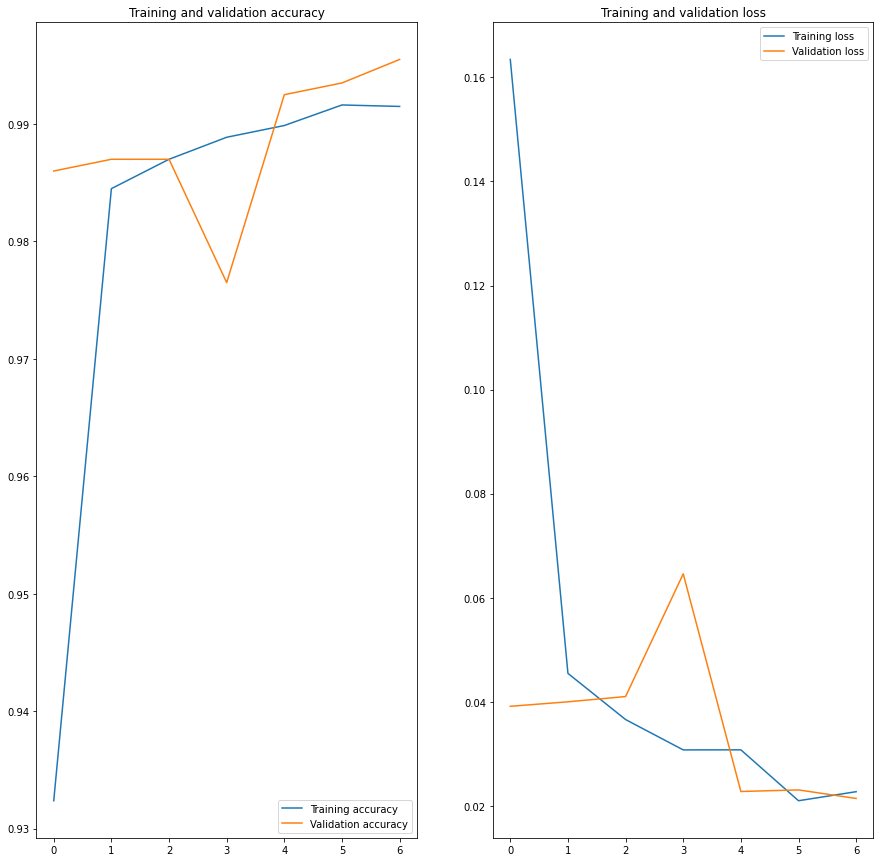

In [36]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label = 'Training accuracy')
plt.plot(epochs_range,val_acc,label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label = 'Training loss')
plt.plot(epochs_range,val_loss,label = 'Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

In [64]:
def run_model(img_path):
  img = keras.preprocessing.image.load_img(img_path,target_size=(img_height,img_width))
  img_arr = keras.preprocessing.image.img_to_array(img)
  img_arr = tf.expand_dims(img_arr,0)
  predictions = model.predict(img_arr)
  score = tf.nn.softmax(predictions[0])
  confidence = (100 * np.max(score))
  plt_img = pltimg.imread(img_path)
  imp_plot = plt.imshow(plt_img)
  plt.show()
  print("The given image belongs to class => " + class_names[np.argmax(score)])
  print("Confidence => "+ str(confidence))


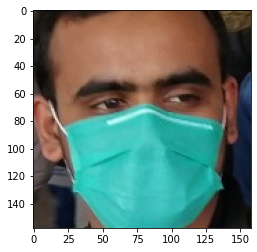

The given image belongs to class => WithMask
Confidence => 100.0


In [79]:
run_model("/content/Face Mask Dataset/Validation/WithMask/1600.png")